# Haberman's Survival Data set  

## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("D:/projects/Haberman's survival/haberman.csv", header =None,
              names=['Age', 'Operation_years', 'axillary_nodes', 'survival_status'])
df.head(5)

,Age,Operation_years,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
#About the Numbers of features and about them


In [5]:
print(df.shape)
print(df.info())

(306, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                306 non-null int64
Operation_years    306 non-null int64
axillary_nodes     306 non-null int64
survival_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [6]:
#Column Names
print(df.columns)
df.head()

Index(['Age', 'Operation_years', 'axillary_nodes', 'survival_status'], dtype='object')


,Age,Operation_years,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
#Editing the Survival class in some meaningfull class
df['survival_status']=df['survival_status'].map({1:"yes",2:"no"})
df['survival_status']=df['survival_status'].astype('category')
print(df.head)

<bound method NDFrame.head of      Age  Operation_years  axillary_nodes survival_status
0     30               64               1             yes
1     30               62               3             yes
2     30               65               0             yes
3     31               59               2             yes
4     31               65               4             yes
5     33               58              10             yes
6     33               60               0             yes
7     34               59               0              no
8     34               66               9              no
9     34               58              30             yes
10    34               60               1             yes
11    34               61              10             yes
12    34               67               7             yes
13    34               60               0             yes
14    35               64              13             yes
15    35               63               0 

# Objective

In this data set we have given the patient age, operation year and number of positive auxillary nodes detectedand we have to predict that will the patient survive or not after 5 years based on given data set.

# UNIVARIATE ANALYSIS

C:\Users\Abhi_Uzumaki\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Abhi_Uzumaki\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


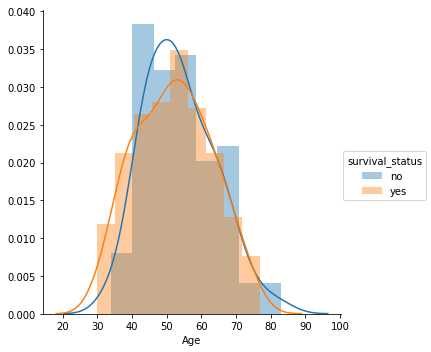

C:\Users\Abhi_Uzumaki\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Abhi_Uzumaki\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


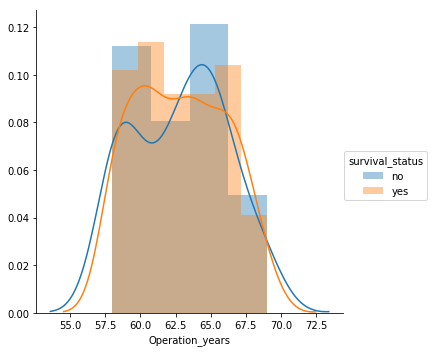

C:\Users\Abhi_Uzumaki\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Abhi_Uzumaki\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


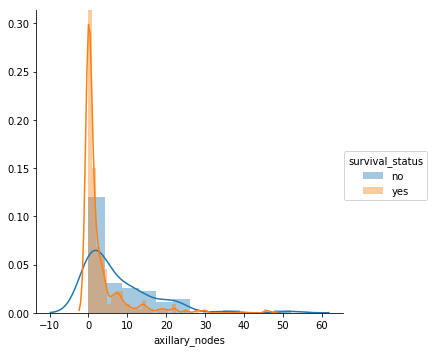

In [8]:
#PDF
fig=sns.FacetGrid(df,hue="survival_status", size=5)
fig.map(sns.distplot,"Age")
fig.add_legend()
plt.show()
fig=sns.FacetGrid(df,hue="survival_status",size=5)
fig.map(sns.distplot,"Operation_years")
fig.add_legend()
plt.show()
fig=sns.FacetGrid(df,hue="survival_status",size=5)
fig.map(sns.distplot,"axillary_nodes")
fig.add_legend()
plt.show()

# BI-VARIATE ANALYSIS
## 2-D Scatter Plot

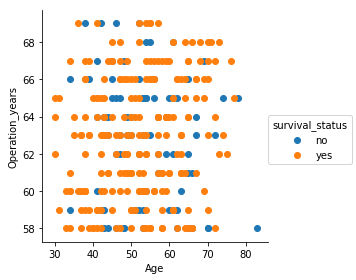

In [9]:
fig=sns.FacetGrid(df,hue="survival_status", size=4)
fig.map(plt.scatter,'Age','Operation_years')
fig.add_legend()
plt.show()

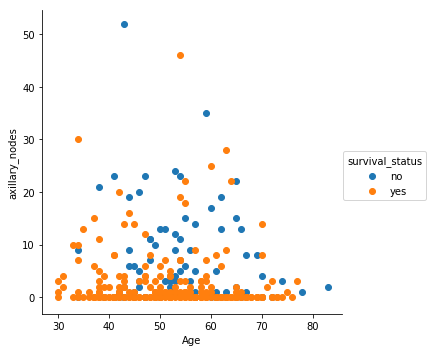

In [10]:
fig=sns.FacetGrid(df,hue="survival_status", size=5)
fig.map(plt.scatter, 'Age', 'axillary_nodes')
fig.add_legend()
plt.show()

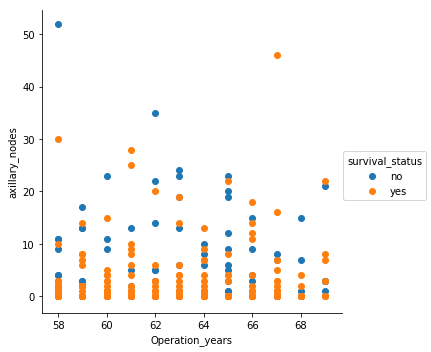

In [11]:
fig=sns.FacetGrid(df,hue="survival_status", size=5)
fig.map(plt.scatter, 'Operation_years', 'axillary_nodes')
fig.add_legend()
plt.show()

# PAIR PLOT

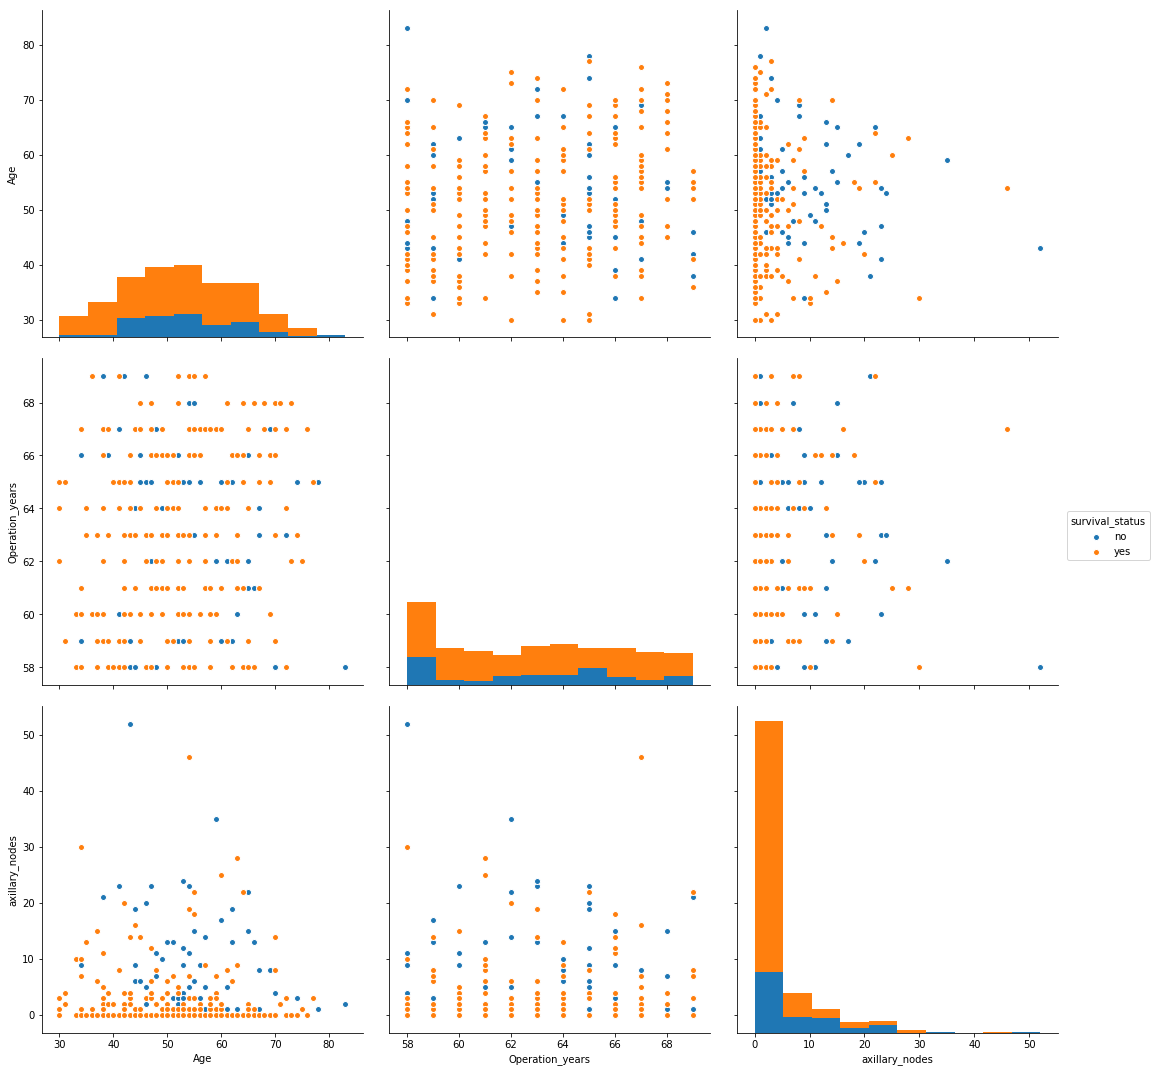

In [12]:
sns.pairplot(df, hue='survival_status', size=5)
plt.show()

# Observation

After analysing the scatter plot i obesrved that the plot between age and auxillary nodes is seperating the classes better than other .

# Applying Model

In [15]:
df.head()

,Age,Operation_years,axillary_nodes,survival_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [16]:
def class_label_mapping(x):
    if x=='yes':
        return 1
    else:
        return 0
df['survival_status']=df[['survival_status']].applymap(lambda x:class_label_mapping(x))


In [17]:
df.head(5)

,Age,Operation_years,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [18]:
df.survival_status.value_counts()

1    225
0     81
Name: survival_status, dtype: int64

# Data Preprocessing

In [20]:
y=df['survival_status']
x=df.drop('survival_status', axis=1)

###### Train Test splitting

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
y_pred=model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)

In [25]:
print(acc)

0.7391304347826086
